In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import re
from collections import Counter
import math
np.random.seed(123)

**1**. (20 points) 

Create a `pandas` DataFrame with these values

|name|a-b-|a-b+|a+b-|a+b+|
|-|-|-|-|-|
|ann|1|2|3|4|
|bob|5|6|7|8|

Now convert it to another DataFrame so that it looks like

|    | name   | a   | b   |   value |
|---:|:-------|:----|:----|--------:|
|  0 | ann    | -   | -   |       1 |
|  2 | ann    | -   | +   |       2 |
|  4 | ann    | +   | -   |       3 |
|  6 | ann    | +   | +   |       4 |
|  1 | bob    | -   | -   |       5 |
|  3 | bob    | -   | +   |       6 |
|  5 | bob    | +   | -   |       7 |
|  7 | bob    | +   | +   |       8 |

Note - all information used to construct the second DataFrame must be derived from the first one.

In [152]:
# Create starting DataFrame
start_df = pd.DataFrame(data = np.arange(1, 9).reshape(2, -1),
                       columns = ['a-b-', 'a-b+', 'a+b-', 'a+b+'])
start_df.insert(0, 'name', ['ann', 'bob'])

# Melt dataframe to create 8 rows
melt_df = pd.melt(frame = start_df, id_vars = 'name', value_name = 'value').sort_values(by = 'value')

# Transform 'variable' column into desired end state
melt_df.insert(1, melt_df.variable.str.slice(stop = 1)[0], melt_df.variable.str.slice(start = 1, stop = 2))
melt_df.insert(2, melt_df.variable.str.slice(start = 2, stop = 3)[0], melt_df.variable.str.slice(start = 3))
melt_df = melt_df.drop(columns = 'variable')

# Display result
melt_df

,name,a,b,value
0,ann,-,-,1
2,ann,-,+,2
4,ann,+,-,3
6,ann,+,+,4
1,bob,-,-,5
3,bob,-,+,6
5,bob,+,-,7
7,bob,+,+,8


**2**. (20 points)

Simulate $n$ coin toss experiments, in which you toss a coin $k$ times for each experiment. Find the maximum run length of heads (e.g. the sequence `T,T,H,H,H,T,H,H` has a maximum run length of 3 heads in each experiment.  What is the most common maximum run length?

Let $n$ = 10,000 and $k=100$.

In [68]:
def count_heads(num_flips):
    """Flips a coin the amount of times specified and returns the longest streak of consecutive heads"""
    outcome = str(np.random.binomial(n = 1, size = num_flips, p = 0.5)).translate(str.maketrans('', '', '\n '))
    if "1" in outcome:
        return len(max(re.findall(pattern = r'1+', string = outcome), key = len)) 
    else:
        return 0

In [126]:
%%time
# Should be able to parallelize this problem using the above function
count_heads(5)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 430 µs


5

In [5]:
%%time

# Set constants, and initialize outcome storage
n = 10000
k = 100
max_heads = np.zeros(n)

# Perform 10,000 experiments
for flip in range(n):
    outcome = str(np.random.binomial(n = 1, size = k, p = 0.5)).translate(str.maketrans('', '', '\n '))
    max_heads[flip] = len(max(re.findall(pattern = r'1+', string = outcome), key = len)) 
    
# Print results
print("Maximum run length: " + str(int(max(max_heads))))
print("Most common run length: " + str(int(Counter(max_heads).most_common(1)[0][0])))

Maximum run length: 18
Most common run length: 5
CPU times: user 2.59 s, sys: 48 ms, total: 2.64 s
Wall time: 2.58 s


**3**. (20 points)

Wikipedia gives this algorithm for finding prime numbers

To find all the prime numbers less than or equal to a given integer n by Eratosthenes' method:

- Create a list of consecutive integers from 2 through n: (2, 3, 4, ..., n).
- Initially, let p equal 2, the smallest prime number.
- Enumerate the multiples of p by counting to n from 2p in increments of p, and mark them in the list (these will be 2p, 3p, 4p, ...; the p itself should not be marked).
- Find the first number greater than p in the list that is not marked. If there was no such number, stop. Otherwise, let p now equal this new number (which is the next prime), and repeat from step 3.
- When the algorithm terminates, the numbers remaining not marked in the list are all the primes below n.

Find all primes less than 1,000 using this method.

- You may use `numpy` and do not have to follow the algorithm exactly if you can achieve the same results.

*I demonstrate two potential solutions to this problem:*

- *Using filter(), which turns out to be a bit slower*
- *Using a while loop*

In [148]:
%%time

# Create list of all numbers below upper bound (in this case, 1000)
upper_bound = 1000
all_nums = list(range(2, upper_bound))

# Perform algorithm
for num in all_nums:
    all_nums = list(filter(lambda x: x % num != 0 or x == num, all_nums))

# View results
print(all_nums, end = '')  

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 28.8 ms


In [149]:
%%time

# Create list of all numbers below upper bound (in this case, 1000)
upper_bound = 1000
all_nums = list(range(2, upper_bound))

# Perform algorithm
for num in all_nums:
    multiplier = 2
    while num * multiplier < upper_bound:
        if num * multiplier in all_nums:
            all_nums.remove(num * multiplier)
        multiplier += 1
        
# View results
print(all_nums, end = '')

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 9.17 ms


**4**. (40 points)

Write code to generate a plot similar to those shown below using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

![automata](http://mathworld.wolfram.com/images/eps-gif/ElementaryCA_850.gif)



The input to the function making the plots should be a simple list of rules

```python
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
```

which you feed into your `make_plots` function
```python
make_plots(rules, niter)
```

You may, of course, write other helper functions to keep your code modular.

In [153]:
def create_array(niter, rule, binary_states):
    """Creates array of 1's and zeros corresponding to 1D Cellular Automata for given rule and number
    of iterations
    """
    
    # Convert rule (as integer) to 8-bit binary, which corresponds to provided binary states (in order)
    outcomes = format(rule, '08b')
    
    # Initialize result matrix
    result = np.zeros(shape = (1 + niter, 1 + 2*niter + 2))
    result[0, niter + 1] += 1
    
    # Fill in rows of array one at a time
    for curr_iter in range(1, niter + 1):
        prev_row = result[curr_iter - 1, :]
        states = np.c_[prev_row[:-2], prev_row[1:-1], prev_row[2:]][niter - curr_iter : niter + curr_iter + 1]
        indices = [binary_states.index(list(states[entry])) for entry in range(len(states))]
        result[curr_iter, niter - curr_iter + 1 : niter + curr_iter + 2] = \
            np.array([outcomes[index] for index in indices], dtype = int)
    
    # Return result
    return result[:, 1:-1]

In [154]:
def plotting(rules, niter, binary_states):
    """Takes set of rules and plots 1D Cellular Automata"""
    
    # Determine optimal number of rows and columns for display, given number of rules
    if len(rules) % 3 == 0:
        num_col = 3
    elif len(rules) <= 1:
        num_col = 1
    else:
        num_col = 2
    num_row = math.ceil(len(rules) / num_col)
    
    # Generate plots
    axes = []
    fig = plt.figure(figsize = (10, 2 * num_row))
    for location in range(num_row * num_col):
        cell_array = create_array(niter = niter, rule = rules[location], binary_states = binary_states)
        axes.append(fig.add_subplot(num_row, num_col, location + 1))
        axes[-1].set_title("rule " + str(rules[location]))
        plt.pcolormesh(cell_array, edgecolors = 'k', linewidth = 0.01, cmap=ListedColormap(['white', 'black']))
        axes[-1].set_aspect('equal')
        axes[-1].invert_yaxis()
        axes[-1].set_xticklabels([])
        axes[-1].set_yticklabels([])
        axes[-1].xaxis.set_ticks_position('none')
        axes[-1].yaxis.set_ticks_position('none')

In [155]:
def make_plots(rules, niter):
    """Plots 1D Cellular Automata based on specified rules and number of iterations"""
    
    # Check for valid rules inputs
    if not isinstance(rules, list):
        print("The rules argument should be a list of integers")
        return 
    elif not all(isinstance(entry, int) for entry in rules):
        print("All entries in the list of rules should be integers")
        return
    elif rules == []:
        print("Please enter a non-empty list of rules")
        return
    
    # Check for valid niter input
    if (not isinstance(niter, int)) or (isinstance(niter, int) and niter <= 0):
        print("The niter argument should be an integer greater than zero")
        return
    
    # Define binary states
    binary_states = [[1, 1, 1], [1, 1, 0], [1, 0, 1], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 0, 1], [0, 0, 0]]
    
    # Generate plots
    plotting(rules, niter, binary_states)

CPU times: user 572 ms, sys: 0 ns, total: 572 ms
Wall time: 568 ms


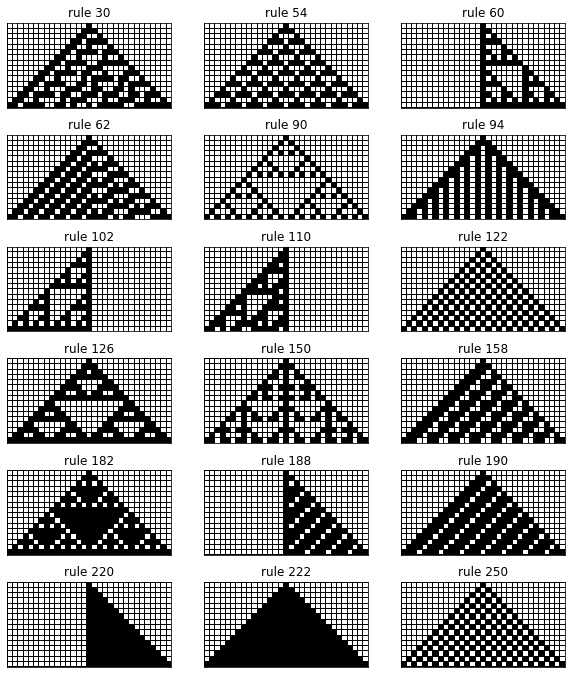

In [157]:
# Test function
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 150, 158, 182, 188, 190, 220, 222, 250]
make_plots(rules = rules, niter = 15)